# Final Project Submission


* Student name: Milena Afeworki
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Questions and Recommendations

* Which genres generate the highest revenue per movie?
* Who are the top 10 directors and writers knows for those highest revenue       genres?
* What is the ideal financial level of investment on movies?

In this next step I am going to import all the necessary libraies and packages that I may need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from glob import glob
%matplotlib inline
import sqlite3


In [2]:
folder = "C:/Users/milen/Flatiron-April05/Final_Project1/movie-exploration/zippedData/"
os.listdir(folder)

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [3]:
csv_files = glob(f"{folder}*.csv*")

In [4]:
# Here is a code to load in files and display preview

tables = {}
dashes='---'*25

for file in csv_files:
    ## Save a variable-friendly version of the file name
    table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
    print(dashes)
    
    ## Load and preview dataframe
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()

---------------------------------------------------------------------------
Preview of zippedData\bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



---------------------------------------------------------------------------
Preview of zippedData\imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



---------------------------------------------------------------------------
Preview of zippedData\imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of zippedData\imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



---------------------------------------------------------------------------
Preview of zippedData\imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



---------------------------------------------------------------------------
Preview of zippedData\imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"



---------------------------------------------------------------------------
Preview of zippedData\imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



---------------------------------------------------------------------------
Preview of zippedData\tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



---------------------------------------------------------------------------
Preview of zippedData\tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Description of each table and column content

* imdb_title_crew: id's to link crew members with titles
* tmdb_movies - titles and stats from IMDB
* imdb_title_akas - link between id and movie title
* imdb_title_ratings - link between title and IMDB ratings
* imdb_name_basics - name of cast member and id
* imdb_title_basics - movie title, id, and runtime
* tn_movie_budgets - movie title, release date, and earnings/costs
* bom_movie_gross - movie title, studio, and earnings
* imdb_title_principals - link between movie title and cast cast id

In [5]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [6]:
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']

In [7]:
type(movie_budgets_df)

pandas.core.frame.DataFrame

In [8]:
movie_budgets_df.shape

(5782, 5)

In [9]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [11]:
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [12]:
for col in movie_budgets_df:
    print(col)
    print(movie_budgets_df[col].value_counts(normalize = True)[:5])
    print("==============================================")

release_date
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2013    0.002248
Name: release_date, dtype: float64
movie
Halloween          0.000519
Home               0.000519
King Kong          0.000519
The Love Letter    0.000346
Pet Sematary       0.000346
Name: movie, dtype: float64
production_budget
$20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64
domestic_gross
$0             0.094777
$8,000,000     0.001557
$2,000,000     0.001211
$7,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64
worldwide_gross
$0            0.063473
$8,000,000    0.001557
$7,000,000    0.001038
$2,000,000    0.001038
$4,000,000    0.000692
Name: worldwide_gross, dtype: float64


In [13]:
#changing dtype of columns
#we want to change the types of 3 columns. Good idea to write a function for this

def convert_amt_to_int(df, col):
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(np.int64)
#     df[col] = df[col].replace("$", "").replace(",", "").astype(np.int64)
    return df

In [14]:
#making a list of all the cols where we want to change the dtype 

money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [15]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [16]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [17]:
#confirming no na values
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
#looking at the most occuring values to see if there are any weird values
for col in movie_budgets_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_budgets_df[col].value_counts(normalize = True)[:5]}')
    print("-------------------")

Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2013    0.002248
Name: release_date, dtype: float64
-------------------
Viewing values in col: movie
Top 5 values:
Halloween          0.000519
Home               0.000519
King Kong          0.000519
The Love Letter    0.000346
Pet Sematary       0.000346
Name: movie, dtype: float64
-------------------
Viewing values in col: production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
-------------------
Viewing values in col: domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: domestic_gross, dtype: float64
-------------------
Viewing values in col: worldwide_gross
Top 5 values:
0          0.063473
8000000    0.001557
7000000    0

In [19]:
#getting the required difference column Now that we know our dataframe has clean
# data, we can start working on the logic needed to get the top 5 grossing movies.
# As we have the production budget available, we can create a new column which will have the profits the movie has made.


movie_budgets_df['budget_gross_diff'] = movie_budgets_df['worldwide_gross'] - \
                                        movie_budgets_df['production_budget']
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [20]:
#getting the top 5 most grossing films
movie_budgets_df = movie_budgets_df.sort_values(by='budget_gross_diff', ascending=False)

In [21]:
movie_budgets_df.shape

(5782, 6)

In [22]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [23]:
#deciding to go into more details with 50 films
movie_budgets_df_top50 = movie_budgets_df[:50]

In [24]:
movie_budgets_df_top50.shape

(50, 6)

In [25]:
movie_budgets_df_top50.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


<AxesSubplot:xlabel='budget_gross_diff', ylabel='movie'>

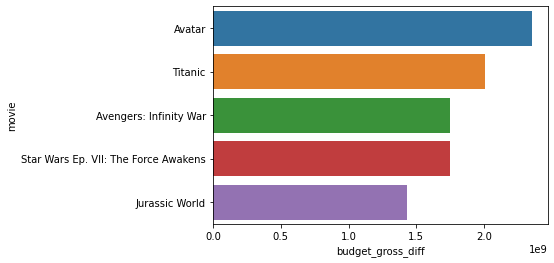

In [26]:
sns.barplot(x = "budget_gross_diff", y = "movie", data = movie_budgets_df_top50[:5])

In [27]:
# Exploring the percent of return We realized that with this direct dollar value we are ignoring any movies
# that might have made a little less money at the box office. Hence we are interested in exploring the percent of return on the
# production budget



In [28]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [29]:
# For getting the percent of return we just need to divide the new column we created by the production budget and store the values in a
# new column
movie_budgets_df['roi'] = movie_budgets_df['budget_gross_diff'] / movie_budgets_df['production_budget']

In [30]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,10.041042
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,6.669092


In [31]:
movie_budgets_df = movie_budgets_df.sort_values(by='roi', ascending=False)

In [32]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
id,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,44975000,1799.000000
14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,99550000,497.750000
93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,193733034,430.517853
80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,415.564740
7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000,412.833333


In [33]:
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
budget_gross_diff    0
roi                  0
dtype: int64

We now have a dataframe sorted by the return on the production budget that we started with

Main problem we run into now is that we have movies with really low budgets coming at the top. We know Microsoft will want to enter the movie industry with a bang and we are assuming they will have a budget of at least $10 million.

We will ignore any movies with a budget smaller than that

In [34]:
movie_budgets_df = movie_budgets_df[movie_budgets_df['production_budget'] > 10000000]

In [35]:
movie_budgets_df.shape

(3535, 7)

In [36]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
id,,,,,,,
26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000,435110554,792965326,782465326,74.520507
65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,775598007,70.508910
18,"May 25, 2012",Les Intouchables,10800000,13182281,484873045,474073045,43.895652
41,"Jun 20, 1975",Jaws,12000000,260000000,470700000,458700000,38.225000
42,"Dec 26, 1973",The Exorcist,12000000,230347346,428214478,416214478,34.684540


<AxesSubplot:xlabel='roi', ylabel='movie'>

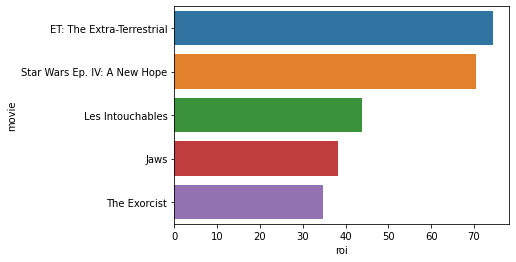

In [37]:
sns.barplot(x = "roi", y = "movie", data = movie_budgets_df[:5])

What are the most popular genres? Bringing in a dataframe with genre details Now that we have the movies, having some more information about the movies like their genre will give us some advanced insights

In [38]:
#title basics df will have all the required info
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']

In [39]:
imdb_title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [40]:
movie_budgets_df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 26
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       50 non-null     object
 1   movie              50 non-null     object
 2   production_budget  50 non-null     int64 
 3   domestic_gross     50 non-null     int64 
 4   worldwide_gross    50 non-null     int64 
 5   budget_gross_diff  50 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ KB


In [41]:
movie_budgets_df_top50['release_year'] = pd.to_datetime(movie_budgets_df_top50['release_date']).dt.year

In [42]:
movie_budgets_df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 26
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       50 non-null     object
 1   movie              50 non-null     object
 2   production_budget  50 non-null     int64 
 3   domestic_gross     50 non-null     int64 
 4   worldwide_gross    50 non-null     int64 
 5   budget_gross_diff  50 non-null     int64 
 6   release_year       50 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.1+ KB


In [43]:
movie_budgets_df_top50.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015


In [44]:
movie_details_df2 = pd.merge(movie_budgets_df_top50, imdb_title_basics_df, left_on=  ['movie', 'release_year'],
                   right_on= ['primary_title', 'start_year'], 
                   how = 'left')

In [45]:
movie_details_df2.shape

(51, 12)

In [46]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       51 non-null     object 
 1   movie              51 non-null     object 
 2   production_budget  51 non-null     int64  
 3   domestic_gross     51 non-null     int64  
 4   worldwide_gross    51 non-null     int64  
 5   budget_gross_diff  51 non-null     int64  
 6   release_year       51 non-null     int64  
 7   primary_title      33 non-null     object 
 8   original_title     33 non-null     object 
 9   start_year         33 non-null     float64
 10  runtime_minutes    33 non-null     float64
 11  genres             33 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.2+ KB


In [47]:
movie_details_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,NaN,NaN,NaN,NaN,NaN
1,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997,NaN,NaN,NaN,NaN,NaN
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
3,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,NaN,NaN,NaN,NaN,NaN
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"


In [48]:
movie_details_df2.dropna(inplace=True)

In [49]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 2 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   primary_title      33 non-null     object 
 8   original_title     33 non-null     object 
 9   start_year         33 non-null     float64
 10  runtime_minutes    33 non-null     float64
 11  genres             33 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.4+ KB


We did lose information about some of the highest grossing films but those films were being matched inaccurately and that would've led us to having incorrect conclusions

In [50]:

movie_details_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,primary_title,original_title,start_year,runtime_minutes,genres
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
5,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,Furious 7,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
6,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,The Avengers,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
8,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,Black Panther,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"


### Creating a separate column for each genre¶

In [51]:
movie_details_df2['genres'] = movie_details_df2['genres'].apply(lambda x: x.split(",") if x else x)

In [52]:
movie_details_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,primary_title,original_title,start_year,runtime_minutes,genres
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,Jurassic World,Jurassic World,2015.0,124.0,"[Action, Adventure, Sci-Fi]"
5,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,Furious 7,Furious Seven,2015.0,137.0,"[Action, Crime, Thriller]"
6,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,The Avengers,The Avengers,2012.0,143.0,"[Action, Adventure, Sci-Fi]"
8,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,Black Panther,Black Panther,2018.0,134.0,"[Action, Adventure, Sci-Fi]"


In [53]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 2 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   primary_title      33 non-null     object 
 8   original_title     33 non-null     object 
 9   start_year         33 non-null     float64
 10  runtime_minutes    33 non-null     float64
 11  genres             33 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.4+ KB


In [54]:
#making a set of all genres we have. set doesn't allow duplicate values

all_genres = set()
for genres in movie_details_df2['genres']:
    if genres:
        all_genres.update(genres)


In [55]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Music',
 'Musical',
 'Sci-Fi',
 'Thriller'}

In [56]:
#adding cols with zeros for all the genres we have. Will modify genre to 1 if the film is of that genre.

for genre in all_genres:
    movie_details_df2[genre] = np.zeros(shape=movie_details_df2.shape[0])
                                
movie_details_df2.head()
movie_details_df2.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'budget_gross_diff', 'release_year', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'Musical',
       'Family', 'Action', 'Drama', 'Thriller', 'Crime', 'Adventure', 'Music',
       'Comedy', 'Sci-Fi', 'Animation', 'Biography', 'Fantasy'],
      dtype='object')

In [57]:
#setting the genre to be 1 if the film is of that genre

for index, row in movie_details_df2.iterrows():
    print(row)
    if row['genres']:
        for genre in row['genres']:
            movie_details_df2.loc[index, genre] = 1

movie_details_df2.head()

release_date                        Apr 27, 2018
movie                     Avengers: Infinity War
production_budget                      300000000
domestic_gross                         678815482
worldwide_gross                       2048134200
budget_gross_diff                     1748134200
release_year                                2018
primary_title             Avengers: Infinity War
original_title            Avengers: Infinity War
start_year                                  2018
runtime_minutes                              149
genres               [Action, Adventure, Sci-Fi]
Musical                                        0
Family                                         0
Action                                         0
Drama                                          0
Thriller                                       0
Crime                                          0
Adventure                                      0
Music                                          0
Comedy              

Name: 45, dtype: object
release_date                  Jul 20, 2012
movie                The Dark Knight Rises
production_budget                275000000
domestic_gross                   448139099
worldwide_gross                 1084439099
budget_gross_diff                809439099
release_year                          2012
primary_title        The Dark Knight Rises
original_title       The Dark Knight Rises
start_year                            2012
runtime_minutes                        164
genres                  [Action, Thriller]
Musical                                  0
Family                                   0
Action                                   0
Drama                                    0
Thriller                                 0
Crime                                    0
Adventure                                0
Music                                    0
Comedy                                   0
Sci-Fi                                   0
Animation                     

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,primary_title,original_title,start_year,...,Drama,Thriller,Crime,Adventure,Music,Comedy,Sci-Fi,Animation,Biography,Fantasy
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,Avengers: Infinity War,2018.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,Jurassic World,Jurassic World,2015.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,Furious 7,Furious Seven,2015.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,The Avengers,The Avengers,2012.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,Black Panther,Black Panther,2018.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
movie_details_df_modified = movie_details_df2.drop(columns = 'genres')

In [59]:
#checking the counts for all different genres

for col in movie_details_df_modified:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df_modified[col].value_counts()}')

Viewing values in col: release_date
Top 5 values:
Mar 5, 2010     2
Jul 8, 2016     1
Dec 20, 2017    1
Nov 2, 2018     1
Mar 8, 2019     1
Jun 27, 2014    1
Mar 17, 2017    1
Jun 30, 2017    1
Feb 16, 2018    1
Mar 4, 2016     1
Dec 21, 2018    1
Apr 15, 2016    1
Jun 29, 2011    1
Jun 12, 2015    1
Dec 16, 2016    1
Jun 18, 2010    1
May 6, 2016     1
May 4, 2012     1
Jul 20, 2012    1
Jul 10, 2015    1
Jun 22, 2018    1
Jun 17, 2016    1
Jul 13, 2012    1
Apr 14, 2017    1
May 1, 2015     1
Apr 3, 2015     1
Nov 22, 2013    1
Apr 27, 2018    1
Jul 3, 2013     1
May 3, 2013     1
Jun 15, 2018    1
Nov 8, 2012     1
Name: release_date, dtype: int64
Viewing values in col: movie
Top 5 values:
Alice in Wonderland                2
Jumanji: Welcome to the Jungle     1
Furious 7                          1
Finding Dory                       1
Avengers: Age of Ultron            1
Jurassic World: Fallen Kingdom     1
The Dark Knight Rises              1
Bohemian Rhapsody                  1
Ic

In [60]:
#making a list of all genres

cols = list(movie_details_df2.columns)

In [61]:
genre_cols = cols[12:]

In [62]:
#getting a dict with genre counts

genre_count = {}
for col in genre_cols:
    count = np.sum(movie_details_df2[col] == 1)
    genre_count[col] = count

In [63]:
genre_count

{'Musical': 2,
 'Family': 3,
 'Action': 19,
 'Drama': 2,
 'Thriller': 4,
 'Crime': 2,
 'Adventure': 27,
 'Music': 1,
 'Comedy': 10,
 'Sci-Fi': 12,
 'Animation': 10,
 'Biography': 1,
 'Fantasy': 4}

In [64]:
keys = list(genre_count.keys())
values = list(genre_count.values())


sorted_top3_values = sorted(values, key = lambda x: x, reverse = True)[:3]
print(sorted_top3_values)


[27, 19, 12]


<AxesSubplot:>

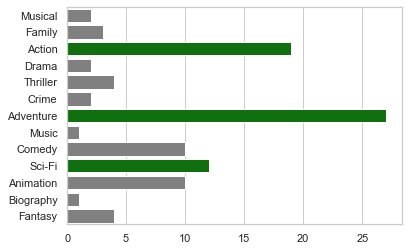

In [65]:
sns.set_theme(style='whitegrid')
clrs = ['green' if (x in sorted_top3_values) else 'grey' for x in values ]
sns.barplot(y = keys, x = values, palette=clrs)
            
            # sns.swarmplot(kind='strip', color = 'rgb')
       

In [66]:
worldwide_gross = {}
for genre in all_genres:
    grouped = movie_details_df2.groupby(by = "".join(genre)).sum()
    worldwide_gross[genre] = grouped.iloc[1]["worldwide_gross"]
    
    print(worldwide_gross[genre])

2284690816.0
3247545363.0
24329872342.0
1857839889.0
4948535141.0
2753569061.0
31799000509.0
894985342.0
10283286863.0
16027425657.0
10561311381.0
894985342.0
4457076566.0


[31799000509.0, 24329872342.0, 16027425657.0]


<AxesSubplot:>

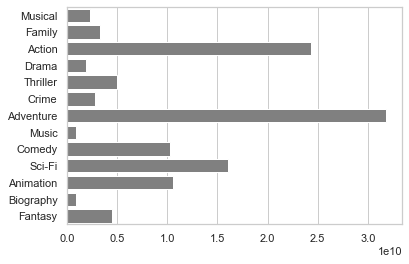

In [67]:
key = list(worldwide_gross.keys())
value = list(worldwide_gross.values())

sorted_top3_values = sorted(value, key = lambda x: x, reverse = True)[:3]
print(sorted_top3_values)

sns.set_theme(style='whitegrid')
clrs = ['green' if (x in sorted_top3_values) else 'grey' for x in values ]
sns.barplot(y = key, x = value, palette=clrs)


In [68]:
# movie_details_df2
budget_gross_diff = {}
for genre in all_genres:
    grouped = movie_details_df2.groupby(by = "".join(genre)).median()
    budget_gross_diff[genre] = grouped.iloc[1]["budget_gross_diff"]
    
    
budget_gross_diff

{'Musical': 962345408.0,
 'Family': 825491110.0,
 'Action': 986894640.0,
 'Drama': 813919944.5,
 'Thriller': 947686624.0,
 'Crime': 1156784530.5,
 'Adventure': 928790543.0,
 'Music': 839985342.0,
 'Comedy': 871962904.5,
 'Sci-Fi': 1043903117.5,
 'Animation': 884323225.5,
 'Biography': 839985342.0,
 'Fantasy': 906192875.0}

[1156784530.5, 1043903117.5, 986894640.0]


<AxesSubplot:>

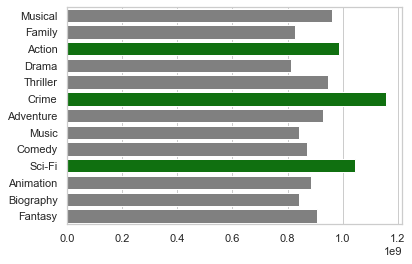

In [69]:
key = list(budget_gross_diff.keys())
value = list(budget_gross_diff.values())

sorted_top3_values = sorted(value, key = lambda x: x, reverse = True)[:3]
print(sorted_top3_values)

sns.set_theme(style='whitegrid')
clrs = ['green' if (x in sorted_top3_values) else 'grey' for x in value]
sns.barplot(y = key, x = value, palette=clrs)


Some cleaning of the df before further analysis¶

In [70]:
movie_details_df2.drop(columns=['genres'], inplace=True)

In [71]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 2 to 49
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   primary_title      33 non-null     object 
 8   original_title     33 non-null     object 
 9   start_year         33 non-null     float64
 10  runtime_minutes    33 non-null     float64
 11  Musical            33 non-null     float64
 12  Family             33 non-null     float64
 13  Action             33 non-null     float64
 14  Drama              33 non-null     float64
 15  Thriller           33 non-null     float64
 16  Crime              33 non-nu

In [72]:
movie_details_df2.drop(columns=['primary_title', 'original_title', 'start_year'], inplace=True)

In [73]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 2 to 49
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   runtime_minutes    33 non-null     float64
 8   Musical            33 non-null     float64
 9   Family             33 non-null     float64
 10  Action             33 non-null     float64
 11  Drama              33 non-null     float64
 12  Thriller           33 non-null     float64
 13  Crime              33 non-null     float64
 14  Adventure          33 non-null     float64
 15  Music              33 non-null     float64
 16  Comedy             33 non-nu

In [74]:
movie_details_df2.reset_index(inplace=True)

In [75]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              33 non-null     int64  
 1   release_date       33 non-null     object 
 2   movie              33 non-null     object 
 3   production_budget  33 non-null     int64  
 4   domestic_gross     33 non-null     int64  
 5   worldwide_gross    33 non-null     int64  
 6   budget_gross_diff  33 non-null     int64  
 7   release_year       33 non-null     int64  
 8   runtime_minutes    33 non-null     float64
 9   Musical            33 non-null     float64
 10  Family             33 non-null     float64
 11  Action             33 non-null     float64
 12  Drama              33 non-null     float64
 13  Thriller           33 non-null     float64
 14  Crime              33 non-null     float64
 15  Adventure          33 non-null     float64
 16  Music              33 non-nu

In [76]:
movie_details_df2.drop(columns=['index'], inplace= True)

In [77]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   runtime_minutes    33 non-null     float64
 8   Musical            33 non-null     float64
 9   Family             33 non-null     float64
 10  Action             33 non-null     float64
 11  Drama              33 non-null     float64
 12  Thriller           33 non-null     float64
 13  Crime              33 non-null     float64
 14  Adventure          33 non-null     float64
 15  Music              33 non-null     float64
 16  Comedy             33 non-nu

 ### Question-1  Which are the most frequent directors in the top 3 grossing genres.

 ### Question-1  Which are the most frequent directors in the top 3 grossing genres.

Looking into the table with list of titles the professionals are known for and try to extract the directors and writers involved in those movies

In [78]:
name_basics = pd.read_csv("zippedData/imdb.name.basics.csv.gz")
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [79]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [80]:
name_basics['primary_name']
name_basics.drop_duplicates()
# name_basics.isna()


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


## ???????

In [81]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [82]:
# name_basics['primary_profession']

Lets try to merge the title ids of the directors and writers to see who are the too grossing directors first I will try to find the tconst of the genres with top grossing revenue

In [83]:
title_crew_df = pd.read_csv("zippedData/imdb.title.crew.csv.gz")
title_crew_df

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [84]:
title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [85]:
title_basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [86]:
title_basics_df.shape

(146144, 6)

In [87]:
title_basics_df.isna().any()

tconst             False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

## ???????

In [88]:
title_basics_df.drop_duplicates()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


I will start by merging the title_crew data frame and the title_basics based on the common tconst. From there I will start cleaing the data and find the directors and writers known for the top grossing genres.

In [89]:
director_writer_df = pd.merge(title_crew_df, title_basics_df, left_on=  ['tconst'], right_on = ['tconst'],
                   how = 'left')
director_writer_df

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,2012,100.0,Comedy
1,tt0438973,NaN,"nm0175726,nm1802864",Sealand,Sealand,2019,NaN,"Biography,Drama"
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,2012,95.0,Comedy
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,2010,82.0,Thriller
...,...,...,...,...,...,...,...,...
146139,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,2018,80.0,Documentary
146140,tt9001390,nm6711477,nm6711477,The woman and the river,The woman and the river,2017,88.0,"Drama,Mystery"
146141,tt9001494,"nm10123242,nm10123248",NaN,Stone Mountain Georgia 08.28.18,Stone Mountain Georgia 08.28.18,2018,5.0,"Documentary,History,News"
146142,tt9004986,nm4993825,nm4993825,Syndebukken: Prosessen mot Harry Lindstrøm,Syndebukken: Prosessen mot Harry Lindstrøm,2018,NaN,Documentary


In [90]:
director_writer_df.shape

(146144, 8)

In [91]:
director_writer_df = director_writer_df.drop(columns = ['start_year', 'runtime_minutes'], axis=0)
director_writer_df

,tconst,directors,writers,primary_title,original_title,genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,Comedy
1,tt0438973,NaN,"nm0175726,nm1802864",Sealand,Sealand,"Biography,Drama"
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,Drama
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,Comedy
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,Thriller
...,...,...,...,...,...,...
146139,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,Documentary
146140,tt9001390,nm6711477,nm6711477,The woman and the river,The woman and the river,"Drama,Mystery"
146141,tt9001494,"nm10123242,nm10123248",NaN,Stone Mountain Georgia 08.28.18,Stone Mountain Georgia 08.28.18,"Documentary,History,News"
146142,tt9004986,nm4993825,nm4993825,Syndebukken: Prosessen mot Harry Lindstrøm,Syndebukken: Prosessen mot Harry Lindstrøm,Documentary


In [92]:
director_writer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          146144 non-null  object
 1   directors       140417 non-null  object
 2   writers         110261 non-null  object
 3   primary_title   146144 non-null  object
 4   original_title  146123 non-null  object
 5   genres          140736 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [93]:
director_writer_df.dropna(inplace=True)

In [94]:
director_writer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106970 entries, 0 to 146142
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          106970 non-null  object
 1   directors       106970 non-null  object
 2   writers         106970 non-null  object
 3   primary_title   106970 non-null  object
 4   original_title  106970 non-null  object
 5   genres          106970 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


In [95]:
director_writer_df.head()

,tconst,directors,writers,primary_title,original_title,genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,Comedy
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,Drama
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,Comedy
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,Thriller
6,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"Action,Adventure,Fantasy"


Now that I have the data cleaned I will be creating a new series 'top3_gross_genres'
which only consists of the directors and writers involved in top3_grossing_genres. 

In [96]:
director_writer_df['top3_gross_genres'] = np.zeros(shape=director_writer_df.shape[0])
director_writer_df   

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,Comedy,0.0
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,Drama,0.0
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,Comedy,0.0
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,Thriller,0.0
6,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"Action,Adventure,Fantasy",0.0
...,...,...,...,...,...,...,...
146137,tt8998302,nm10121510,nm10121510,Vietnam@55,Vietnam@55,Documentary,0.0
146138,tt8999892,nm10122247,"nm10122247,nm10122246",Dumpster Fire: A Time Of Current Times,Dumpster Fire: A Time Of Current Times,Comedy,0.0
146139,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,Documentary,0.0
146140,tt9001390,nm6711477,nm6711477,The woman and the river,The woman and the river,"Drama,Mystery",0.0


In [97]:
director_writer_df['genres'] = director_writer_df['genres'].apply(lambda x: x.split(",") if x else x)
director_writer_df

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,[Comedy],0.0
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,[Drama],0.0
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,[Comedy],0.0
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,[Thriller],0.0
6,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",0.0
...,...,...,...,...,...,...,...
146137,tt8998302,nm10121510,nm10121510,Vietnam@55,Vietnam@55,[Documentary],0.0
146138,tt8999892,nm10122247,"nm10122247,nm10122246",Dumpster Fire: A Time Of Current Times,Dumpster Fire: A Time Of Current Times,[Comedy],0.0
146139,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,[Documentary],0.0
146140,tt9001390,nm6711477,nm6711477,The woman and the river,The woman and the river,"[Drama, Mystery]",0.0


In [98]:
# This are the top3 grossing genres
top3_genres = ['Adventure', 'Action', 'Sci-Fi']

top_list = []
total_top_list = []

for index, row in director_writer_df.iterrows():
    if row['genres']:
        for genre_list in row['genres']:
            if genre_list in top3_genres:
                top_list.append(genre_list)
            else:
                continue
                
#         director_writer_df.loc[index, director_writer_df['top3_gross_genres']] = top_list  
        total_top_list.append(top_list)
        top_list = []

director_writer_df = director_writer_df.assign(top3_gross_genres = total_top_list)


In [99]:
director_writer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106970 entries, 0 to 146142
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tconst             106970 non-null  object
 1   directors          106970 non-null  object
 2   writers            106970 non-null  object
 3   primary_title      106970 non-null  object
 4   original_title     106970 non-null  object
 5   genres             106970 non-null  object
 6   top3_gross_genres  106970 non-null  object
dtypes: object(7)
memory usage: 6.5+ MB


In [100]:
director_writer_df = director_writer_df[director_writer_df['top3_gross_genres'].map(lambda d: len(d)>0)]

In [101]:
director_writer_df

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres
6,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]"
7,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,Straw Dogs,"[Action, Drama, Thriller]",[Action]
11,tt10011102,nm4853354,"nm2215938,nm0219964",The Sholay Girl,The Sholay Girl,"[Action, Biography, Drama]",[Action]
26,tt10086906,nm10576024,nm10576024,KontrAdiksyon,KontrAdiksyon,[Action],[Action]
39,tt10148094,nm10593130,"nm10604110,nm10593130",Xtrone: Invasion - Part 1,Xtrone: Invasion - Part 1,"[Action, Fantasy, Sci-Fi]","[Action, Sci-Fi]"
...,...,...,...,...,...,...,...
146083,tt8831996,nm6980244,nm6980244,Christianity of Egypt,Christianity of Egypt,"[Adventure, Documentary, History]",[Adventure]
146119,tt8936646,nm1092087,nm0751648,Dhaka,Dhaka,"[Action, Drama]",[Action]
146120,tt8947660,nm10097606,nm10097614,Goyenda Tatar,Goyenda Tatar,[Adventure],[Adventure]
146124,tt8959010,nm3912308,nm3912308,"Hell, or Tidewater","Hell, or Tidewater",[Action],[Action]


### here lets look at another table with the names of the directors and writers involved in thos genres


In [102]:
title_principals = pd.read_csv("zippedData/imdb.title.principals.csv.gz")
title_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


#### here we are going to first join the title.principals and the director_writer_df to find the nconst name of the dir &writers

In [103]:
director_writer_df_modified = pd.merge(director_writer_df, title_principals, left_on=  ['tconst'],
                   right_on= ['tconst'], 
                   how = 'left')
director_writer_df_modified

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres,ordering,nconst,category,job,characters
0,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",10.0,nm2370474,cinematographer,NaN,NaN
1,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",1.0,nm2286991,actress,NaN,"[""The Red Reaper""]"
2,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",2.0,nm2576320,actor,NaN,"[""Eris""]"
3,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",3.0,nm2623919,actor,NaN,"[""Ganesh""]"
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",4.0,nm1918942,actress,NaN,"[""The Teller Witch""]"
...,...,...,...,...,...,...,...,...,...,...,...,...
125944,tt8959010,nm3912308,nm3912308,"Hell, or Tidewater","Hell, or Tidewater",[Action],[Action],9.0,nm10739291,actress,NaN,"[""Lt. Cara Sheddon""]"
125945,tt8965390,nm10105385,nm0766272,Armored Trooper VOTOMS: Case;Irvine,Armored Trooper VOTOMS: Case;Irvine,"[Sci-Fi, War]",[Sci-Fi],1.0,nm1795934,actor,NaN,"[""Irvine""]"
125946,tt8965390,nm10105385,nm0766272,Armored Trooper VOTOMS: Case;Irvine,Armored Trooper VOTOMS: Case;Irvine,"[Sci-Fi, War]",[Sci-Fi],2.0,nm10105385,director,NaN,NaN
125947,tt8965390,nm10105385,nm0766272,Armored Trooper VOTOMS: Case;Irvine,Armored Trooper VOTOMS: Case;Irvine,"[Sci-Fi, War]",[Sci-Fi],3.0,nm0766272,writer,NaN,NaN


In [104]:
director_writer_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125949 entries, 0 to 125948
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             125949 non-null  object 
 1   directors          125949 non-null  object 
 2   writers            125949 non-null  object 
 3   primary_title      125949 non-null  object 
 4   original_title     125949 non-null  object 
 5   genres             125949 non-null  object 
 6   top3_gross_genres  125949 non-null  object 
 7   ordering           125948 non-null  float64
 8   nconst             125948 non-null  object 
 9   category           125948 non-null  object 
 10  job                26453 non-null   object 
 11  characters         54187 non-null   object 
dtypes: float64(1), object(11)
memory usage: 12.5+ MB


We are more interested in the inconst and it only has one row of missing value so we are happily removing that. Also we are going to remove all the other columns that we don;t need

In [105]:
director_writer_df_modified = director_writer_df_modified.drop(columns = ['job', 'characters', 'ordering', 'original_title'])
director_writer_df_modified

,tconst,directors,writers,primary_title,genres,top3_gross_genres,nconst,category
0,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",nm2370474,cinematographer
1,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",nm2286991,actress
2,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",nm2576320,actor
3,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",nm2623919,actor
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",nm1918942,actress
...,...,...,...,...,...,...,...,...
125944,tt8959010,nm3912308,nm3912308,"Hell, or Tidewater",[Action],[Action],nm10739291,actress
125945,tt8965390,nm10105385,nm0766272,Armored Trooper VOTOMS: Case;Irvine,"[Sci-Fi, War]",[Sci-Fi],nm1795934,actor
125946,tt8965390,nm10105385,nm0766272,Armored Trooper VOTOMS: Case;Irvine,"[Sci-Fi, War]",[Sci-Fi],nm10105385,director
125947,tt8965390,nm10105385,nm0766272,Armored Trooper VOTOMS: Case;Irvine,"[Sci-Fi, War]",[Sci-Fi],nm0766272,writer


### As we can see from the dataframe some directors/ writers also have other roles or professions and we can see that the nconst

In [106]:
director_writer_df_modified.dropna(inplace=True)

In [107]:
director_writer_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125948 entries, 0 to 125948
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tconst             125948 non-null  object
 1   directors          125948 non-null  object
 2   writers            125948 non-null  object
 3   primary_title      125948 non-null  object
 4   genres             125948 non-null  object
 5   top3_gross_genres  125948 non-null  object
 6   nconst             125948 non-null  object
 7   category           125948 non-null  object
dtypes: object(8)
memory usage: 8.6+ MB


In [108]:
options = ['director', 'writer']
director_writer_df_modified = director_writer_df_modified.loc[director_writer_df_modified['category'].isin(options)]
director_writer_df_modified
  

,tconst,directors,writers,primary_title,genres,top3_gross_genres,nconst,category
5,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",nm2651190,writer
15,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],nm0527109,director
16,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],nm0329051,writer
17,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],nm0001603,writer
18,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],nm0930684,writer
...,...,...,...,...,...,...,...,...
125930,tt8947660,nm10097606,nm10097614,Goyenda Tatar,[Adventure],[Adventure],nm10097606,director
125931,tt8947660,nm10097606,nm10097614,Goyenda Tatar,[Adventure],[Adventure],nm10097614,writer
125940,tt8959010,nm3912308,nm3912308,"Hell, or Tidewater",[Action],[Action],nm3912308,director
125946,tt8965390,nm10105385,nm0766272,Armored Trooper VOTOMS: Case;Irvine,"[Sci-Fi, War]",[Sci-Fi],nm10105385,director


In [109]:
director_writer_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28712 entries, 5 to 125947
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tconst             28712 non-null  object
 1   directors          28712 non-null  object
 2   writers            28712 non-null  object
 3   primary_title      28712 non-null  object
 4   genres             28712 non-null  object
 5   top3_gross_genres  28712 non-null  object
 6   nconst             28712 non-null  object
 7   category           28712 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


### Now that we have all the nconst of the directors and writers it is time to put a name on nconst

In [110]:
name_basics = pd.read_csv("zippedData/imdb.name.basics.csv.gz")
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [111]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


we are going to drop all the columns that we don't need

In [112]:
name_basics = name_basics.drop(columns = ['birth_year','death_year', 'known_for_titles'])

In [113]:
name_basics

,nconst,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [114]:
name_basics_modified = pd.merge(name_basics, director_writer_df_modified, left_on=  ['nconst'],
                   right_on= ['nconst'], 
                   how = 'right')

In [115]:
name_basics_modified

,nconst,primary_name,primary_profession,tconst,directors,writers,primary_title,genres,top3_gross_genres,category
0,nm2651190,Kim Pritekel,"writer,director,actress",tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]","[Action, Adventure]",writer
1,nm0527109,Rod Lurie,"writer,director,producer",tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],director
2,nm0329051,David Zelag Goodman,writer,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],writer
3,nm0001603,Sam Peckinpah,"writer,director,producer",tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],writer
4,nm0930684,Gordon Williams,writer,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],writer
...,...,...,...,...,...,...,...,...,...,...
28707,nm1092087,Sam Hargrave,"stunts,actor,editor",tt8936646,nm1092087,nm0751648,Dhaka,"[Action, Drama]",[Action],director
28708,nm10097606,Srikanta Galui,director,tt8947660,nm10097606,nm10097614,Goyenda Tatar,[Adventure],[Adventure],director
28709,nm10097614,Sashthi Pada Chattapaddhyay,writer,tt8947660,nm10097606,nm10097614,Goyenda Tatar,[Adventure],[Adventure],writer
28710,nm3912308,Scott C. Newman,"editor,producer,director",tt8959010,nm3912308,nm3912308,"Hell, or Tidewater",[Action],[Action],director


In [116]:
name_basics_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28712 entries, 0 to 28711
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nconst              28712 non-null  object
 1   primary_name        28712 non-null  object
 2   primary_profession  28631 non-null  object
 3   tconst              28712 non-null  object
 4   directors           28712 non-null  object
 5   writers             28712 non-null  object
 6   primary_title       28712 non-null  object
 7   genres              28712 non-null  object
 8   top3_gross_genres   28712 non-null  object
 9   category            28712 non-null  object
dtypes: object(10)
memory usage: 2.4+ MB


In [117]:
grouped = name_basics_modified.groupby(by = 'primary_name').count()

I can see that some of the professionals in the 'primary_name' are known for their roles in more than one title of movie

In [118]:
grouped

,nconst,primary_profession,tconst,directors,writers,primary_title,genres,top3_gross_genres,category
primary_name,,,,,,,,,
A Type Machine,1,1,1,1,1,1,1,1,1
A'Ali de Sousa,1,1,1,1,1,1,1,1,1
A. Deepakraj,5,5,5,5,5,5,5,5,5
A. Indrakumar,1,1,1,1,1,1,1,1,1
A. Mahadev,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Özhan Eren,1,1,1,1,1,1,1,1,1
Özlem Koza,1,1,1,1,1,1,1,1,1
Øivind Solfjeld,1,1,1,1,1,1,1,1,1


we are looking at the directors and writers who have made a certain amount of movies in the industry, maybe we will see the number

In [119]:
name_basics_modified.loc[name_basics_modified['primary_name'] == 'A. Deepakraj']

,nconst,primary_name,primary_profession,tconst,directors,writers,primary_title,genres,top3_gross_genres,category
1335,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt6734984,nm2356507,"nm1189085,nm5635672,nm2356507",Duvvada Jagannadham,"[Action, Comedy]",[Action],writer
1336,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt6522398,nm3008574,"nm1189085,nm0707287,nm4844765,nm5635145,nm2350...",Katamarayudu,"[Action, Comedy]",[Action],writer
1337,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt3142764,nm2050878,"nm1189085,nm4547509,nm5635145,nm6580663,nm2056...",Race Gurram,"[Action, Comedy]",[Action],writer
1338,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt6468814,nm6580663,"nm9581377,nm1189085,nm6580663,nm2056772",Touch Chesi Chudu,[Action],[Action],writer
1339,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt2398340,nm3008574,"nm1189085,nm1416190,nm3008574,nm5635145",Tadakha,[Action],[Action],writer


In [120]:
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']
imdb_title_basics_df

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [121]:
title_basics_df = imdb_title_basics_df.reset_index()

In [122]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [123]:
movie_details_df3 = pd.merge(movie_budgets_df_top50, title_basics_df, left_on=  ['movie', 'release_year'],
                   right_on= ['primary_title', 'start_year'], 
                   how = 'inner')
movie_details_df3

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
1,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
2,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller"
3,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
4,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"
5,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"
6,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,2013,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy"
7,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706,2017,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical"
8,"Jul 10, 2015",Minions,74000000,336045770,1160336173,1086336173,2015,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy"
9,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"


In [124]:
movie_details_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   tconst             33 non-null     object 
 8   primary_title      33 non-null     object 
 9   original_title     33 non-null     object 
 10  start_year         33 non-null     int64  
 11  runtime_minutes    33 non-null     float64
 12  genres             33 non-null     object 
dtypes: float64(1), int64(6), object(6)
memory usage: 3.6+ KB


now join the nconst table and finally make a graph of the money directors made. and drop columns we dont need.

In [125]:
movie_details_df3 = movie_details_df3.drop(columns=['primary_title', 'start_year', 'runtime_minutes', 'release_year', 'original_title'])

In [126]:
movie_details_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       33 non-null     object
 1   movie              33 non-null     object
 2   production_budget  33 non-null     int64 
 3   domestic_gross     33 non-null     int64 
 4   worldwide_gross    33 non-null     int64 
 5   budget_gross_diff  33 non-null     int64 
 6   tconst             33 non-null     object
 7   genres             33 non-null     object
dtypes: int64(4), object(4)
memory usage: 2.3+ KB


In [127]:
dir_writer_modified = pd.merge(movie_details_df3, name_basics_modified, left_on=  ['tconst'],
                   right_on= ['tconst'], 
                   how = 'left')
dir_writer_modified

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,genres_x,nconst,primary_name,primary_profession,directors,writers,primary_title,genres_y,top3_gross_genres,category
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0456158,Jack Kirby,"writer,animation_department,miscellaneous","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Adventure, Sci-Fi]",writer
1,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0498278,Stan Lee,"producer,writer,actor","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Adventure, Sci-Fi]",writer
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,"producer,director,writer","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Adventure, Sci-Fi]",director
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo,"producer,director,writer","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Adventure, Sci-Fi]",director
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm1321655,Christopher Markus,"writer,producer,actor","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Adventure, Sci-Fi]",writer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,tt1667889,"Adventure,Animation,Comedy",nm0553942,Steve Martino,"director,miscellaneous,art_department","nm0862211,nm0553942","nm0073850,nm0297229,nm1000858",Ice Age: Continental Drift,"[Adventure, Animation, Comedy]",[Adventure],director
125,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,tt1667889,"Adventure,Animation,Comedy",nm0297229,Jason Fuchs,"actor,writer,producer","nm0862211,nm0553942","nm0073850,nm0297229,nm1000858",Ice Age: Continental Drift,"[Adventure, Animation, Comedy]",[Adventure],writer
126,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,tt1667889,"Adventure,Animation,Comedy",nm0862211,Mike Thurmeier,"director,animation_department,visual_effects","nm0862211,nm0553942","nm0073850,nm0297229,nm1000858",Ice Age: Continental Drift,"[Adventure, Animation, Comedy]",[Adventure],director
127,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,tt1667889,"Adventure,Animation,Comedy",nm0073850,Michael Berg,"writer,producer","nm0862211,nm0553942","nm0073850,nm0297229,nm1000858",Ice Age: Continental Drift,"[Adventure, Animation, Comedy]",[Adventure],writer


In [128]:
dir_writer_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   release_date        129 non-null    object
 1   movie               129 non-null    object
 2   production_budget   129 non-null    int64 
 3   domestic_gross      129 non-null    int64 
 4   worldwide_gross     129 non-null    int64 
 5   budget_gross_diff   129 non-null    int64 
 6   tconst              129 non-null    object
 7   genres_x            129 non-null    object
 8   nconst              126 non-null    object
 9   primary_name        126 non-null    object
 10  primary_profession  126 non-null    object
 11  directors           126 non-null    object
 12  writers             126 non-null    object
 13  primary_title       126 non-null    object
 14  genres_y            126 non-null    object
 15  top3_gross_genres   126 non-null    object
 16  category            126 no

In [129]:
dir_writer_modified.dropna(inplace=True)

In [130]:
dir_writer_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 128
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   release_date        126 non-null    object
 1   movie               126 non-null    object
 2   production_budget   126 non-null    int64 
 3   domestic_gross      126 non-null    int64 
 4   worldwide_gross     126 non-null    int64 
 5   budget_gross_diff   126 non-null    int64 
 6   tconst              126 non-null    object
 7   genres_x            126 non-null    object
 8   nconst              126 non-null    object
 9   primary_name        126 non-null    object
 10  primary_profession  126 non-null    object
 11  directors           126 non-null    object
 12  writers             126 non-null    object
 13  primary_title       126 non-null    object
 14  genres_y            126 non-null    object
 15  top3_gross_genres   126 non-null    object
 16  category            126 no

In [131]:
dir_writer_modified = dir_writer_modified.drop(
                                        columns=['top3_gross_genres','genres_y',
                                        'writers', 'directors', 'primary_title'])

In [132]:
dir_writer_modified.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,genres_x,nconst,primary_name,primary_profession,category
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0456158,Jack Kirby,"writer,animation_department,miscellaneous",writer
1,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0498278,Stan Lee,"producer,writer,actor",writer
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,"producer,director,writer",director
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo,"producer,director,writer",director
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm1321655,Christopher Markus,"writer,producer,actor",writer


In [133]:
dir_writer_modified = dir_writer_modified.sort_values(by='budget_gross_diff', ascending=False)
dir_writer_modified

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,genres_x,nconst,primary_name,primary_profession,category
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0456158,Jack Kirby,"writer,animation_department,miscellaneous",writer
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,"producer,director,writer",director
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo,"producer,director,writer",director
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm1321655,Christopher Markus,"writer,producer,actor",writer
5,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm1321656,Stephen McFeely,"writer,producer,actor",writer
...,...,...,...,...,...,...,...,...,...,...,...,...
124,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,tt1667889,"Adventure,Animation,Comedy",nm0553942,Steve Martino,"director,miscellaneous,art_department",director
125,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,tt1667889,"Adventure,Animation,Comedy",nm0297229,Jason Fuchs,"actor,writer,producer",writer
126,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,tt1667889,"Adventure,Animation,Comedy",nm0862211,Mike Thurmeier,"director,animation_department,visual_effects",director
127,"Jul 13, 2012",Ice Age: Continental Drift,95000000,161321843,879765137,784765137,tt1667889,"Adventure,Animation,Comedy",nm0073850,Michael Berg,"writer,producer",writer


In [134]:
dir_writer_top10 = dir_writer_modified[:10]
dir_writer_top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 7
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   release_date        10 non-null     object
 1   movie               10 non-null     object
 2   production_budget   10 non-null     int64 
 3   domestic_gross      10 non-null     int64 
 4   worldwide_gross     10 non-null     int64 
 5   budget_gross_diff   10 non-null     int64 
 6   tconst              10 non-null     object
 7   genres_x            10 non-null     object
 8   nconst              10 non-null     object
 9   primary_name        10 non-null     object
 10  primary_profession  10 non-null     object
 11  category            10 non-null     object
dtypes: int64(4), object(8)
memory usage: 1.0+ KB


In [135]:
all_names = []
for names in dir_writer_top10['primary_name']:
    all_names.append(names)
# 
all_names = set(all_names)
all_names

{'Amanda Silver',
 'Anthony Russo',
 'Christopher Markus',
 'Colin Trevorrow',
 'Derek Connolly',
 'Jack Kirby',
 'Joe Russo',
 'Michael Crichton',
 'Stan Lee',
 'Stephen McFeely'}

In [136]:
grouped = dir_writer_modified.groupby(by = "primary_name").median()
grouped

,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
primary_name,,,,
Amanda Silver,215000000.0,652270625.0,1.648855e+09,1.433855e+09
Andrew Stanton,200000000.0,450650220.5,1.045047e+09,8.450474e+08
Angus MacLane,200000000.0,486295561.0,1.021215e+09,8.212152e+08
Anna Boden,175000000.0,426525952.0,1.123062e+09,9.480616e+08
Anthony Russo,275000000.0,543449915.5,1.594102e+09,1.319102e+09
...,...,...,...,...
Tony Gilroy,200000000.0,532177324.0,1.049103e+09,8.491029e+08
Victoria Strouse,200000000.0,486295561.0,1.021215e+09,8.212152e+08
Will Beall,160000000.0,335061807.0,1.146895e+09,9.868946e+08


In [137]:
names_dir_writer = {}

for name in all_names:   
    names_dir_writer[name] = grouped.loc[name]['budget_gross_diff']
names_dir_writer


{'Anthony Russo': 1319101806.5,
 'Stephen McFeely': 1319101806.5,
 'Jack Kirby': 1072413963.0,
 'Joe Russo': 1319101806.5,
 'Michael Crichton': 1284813831.5,
 'Colin Trevorrow': 1284813831.5,
 'Christopher Markus': 1319101806.5,
 'Stan Lee': 1110336093.5,
 'Derek Connolly': 1284813831.5,
 'Amanda Silver': 1433854864.0}

In [138]:
names_dir_writer = dict(sorted(names_dir_writer.items(), key = lambda item : item[1], reverse = True))
names_dir_writer

{'Amanda Silver': 1433854864.0,
 'Anthony Russo': 1319101806.5,
 'Stephen McFeely': 1319101806.5,
 'Joe Russo': 1319101806.5,
 'Christopher Markus': 1319101806.5,
 'Michael Crichton': 1284813831.5,
 'Colin Trevorrow': 1284813831.5,
 'Derek Connolly': 1284813831.5,
 'Stan Lee': 1110336093.5,
 'Jack Kirby': 1072413963.0}

[1433854864.0, 1319101806.5, 1319101806.5]


<AxesSubplot:>

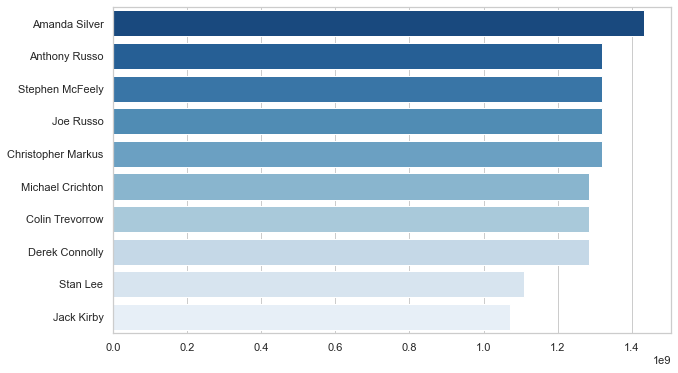

In [139]:
keys = list(names_dir_writer.keys())
values = list(names_dir_writer.values())

sorted_top3_values = sorted(values, key = lambda x: x, reverse = True)[:3]
print(sorted_top3_values)
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(y = keys, x = values, data = dir_writer_top10, palette='Blues_r')
